<AxesSubplot:xlabel='0', ylabel='1'>

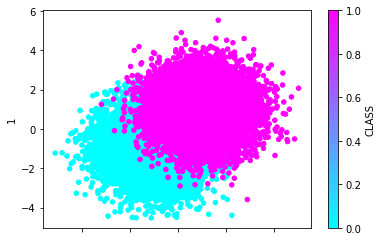

In [226]:
from pandas import DataFrame
import numpy as np

# Ejercicio a)
def create_points_a(d: int, n: int, C: float) -> DataFrame:
    '''
    create_points_a: int -> int -> float -> DataFrame
    d: Dimension de los puntos
    n: Cantidad de puntos a crear
    C: Flotante para calcular la desviación estándar

    '''
    
    center0, center1 = np.array([-1]*d), np.array([1]*d)
    cov = np.diag([(C*np.sqrt(d))**2]*d)
    mid = n // 2

    # Generate randoms points
    class0 = np.random.multivariate_normal(center0, cov, mid)
    class1 = np.random.multivariate_normal(center1, cov, n-mid)
    
    # Add class column
    class0 = np.c_[class0, np.zeros(mid)]
    class1 = np.c_[class1, np.ones(n-mid)]
    dataframe: DataFrame = DataFrame(data=np.r_[class0, class1], columns=list(range(d))+['CLASS'])

    return dataframe

dataframe = create_points_a(2, 200, .75)
dataframe.plot(x=0, y=1, kind='scatter', c='CLASS', colormap='cool')

<AxesSubplot:xlabel='0', ylabel='1'>

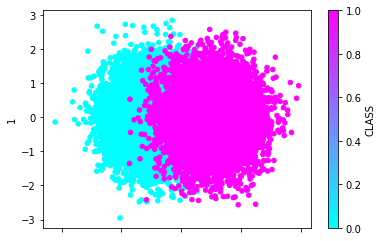

In [224]:
from pandas import DataFrame
import numpy as np

# Ejercicio b)
def create_points_b(d: int, n: int, C: float) -> DataFrame:
    '''
    create_points_b: int -> int -> float -> DataFrame
    d: Dimension de los puntos
    n: Cantidad de puntos a crear
    C: Flotante para calcular la desviación estándar

    '''
    
    center0, center1 = np.array([-1]+[0]*(d-1)), np.array([1]+[0]*(d-1))
    cov = np.diag([C**2]*d)
    mid = n // 2

    # GGeneramos los puntos alertorios
    class0 = np.random.multivariate_normal(center0, cov, mid)
    class1 = np.random.multivariate_normal(center1, cov, n-mid)
    
    # Agregamos la columna de clases
    class0 = np.c_[class0, np.zeros(mid)]
    class1 = np.c_[class1, np.ones(n-mid)]

    # Creamos el DataFrame
    dataframe: DataFrame = DataFrame(data=np.r_[class0, class1], columns=list(range(d))+['CLASS'])

    return dataframe

dataframe = create_points_b(2, 200, .75)
dataframe.plot(x=0, y=1, kind='scatter', c='CLASS', colormap='cool')

In [225]:
from pandas import DataFrame
import numpy as np

def get_dataframes_mean(d: int, n: int, C: float) -> tuple[DataFrame, DataFrame]:
    dataframe_a = create_points_a(d, n, C)
    dataframe_b = create_points_b(d, n, C)

    mean_a = dataframe_a.groupby(["CLASS"]).mean()
    mean_b = dataframe_b.groupby(["CLASS"]).mean()

    return mean_a, mean_b

def get_dataframes_std(d: int, n: int, C: float) -> tuple[DataFrame, DataFrame]:
    dataframe_a = create_points_a(d, n, C)
    dataframe_b = create_points_b(d, n, C)

    std_a = dataframe_a.groupby(["CLASS"]).std()
    std_b = dataframe_b.groupby(["CLASS"]).std()

    return std_a, std_b


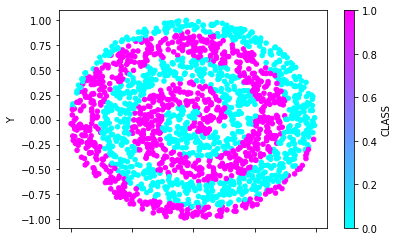

In [2]:
from pandas import DataFrame
import random
import numpy as np

# Ejercicio c)
def generate_polars_points(n: int, r: int) -> tuple[list[float], list[float]]:
    ro = [r * np.sqrt(random.random()) for _ in range(n)]
    theta = [2 * np.pi * random.random() for _ in range(n)]
    return ro, theta

def classify_polars_points(ro: list[float], theta: list[float]) -> DataFrame:
    def fun1(t):
        return t/(4*np.pi)

    def fun2(t):
        return (t+np.pi)/(4*np.pi)
    
    def condition(t, r):
        return (fun1(t) <= r and r <= fun2(t) 
                or fun1(t+2*np.pi) <= r and r <= fun2(t+2*np.pi)
                or fun1(t-2*np.pi) <= r and r <= fun2(t-2*np.pi))

    classes = [1 if condition(t, r) else 0 for (r,t) in zip(ro, theta)]
    
    return classes

def plot_polars_points(ro: list[float], theta: list[float], classes: list[int]):
    xs = [r * np.cos(t) for (r, t) in zip(ro, theta)]
    ys = [r * np.sin(t) for (r, t) in zip(ro, theta)]

    df = DataFrame({"X":xs, "Y":ys, "CLASS": classes})
    df.plot(x=0, y=1, kind='scatter', c='CLASS', colormap='cool')
    # return df


ro, theta = generate_polars_points(2000, 1)
classes = classify_polars_points(ro, theta)
plot_polars_points(ro, theta, classes)